<a href="https://colab.research.google.com/github/AnastasiiaDm/machine-learning/blob/main/DZ_5_linear_regression/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
red_wine = pd.read_csv('winequality-red.csv', sep=';')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white_wine = pd.read_csv('winequality-white.csv', sep=';')
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
# Combine datasets
red_wine['wine_type'] = 0
white_wine['wine_type'] = 1
data = pd.concat([red_wine, white_wine])

In [8]:
# Primary Data Analysis
print(f"Dataset Shape: {data.shape}")

Dataset Shape: (6497, 13)


number of rows: 6497

number of columns: 13

In [9]:
# Primary Data Analysis
print(f"Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


number of rows: 6497

number of white wine: 4897, that's why index is 0 to 4897 if data will be changed to data = pd.concat([white_wine, red_wine]), the index would be 0 to 1599

In [10]:
# Primary Data Analysis
data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


no missing/empty values in dataset


In [11]:
# Check for categorical features
print("Data Types:")
print(data.dtypes)

Data Types:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                 int64
dtype: object


data type: float or int

In [12]:
red_wine_sugar = data[data["wine_type"] == 0]["residual sugar"]
white_wine_sugar = data[data["wine_type"] == 1]["residual sugar"]

red_stats = red_wine_sugar.describe()
white_stats = white_wine_sugar.describe()

print(f"Red Wine Residual Sugar Stats:\n {red_stats}\n")
print(f"White Wine Residual Sugar Stats:\n {white_stats}")

Red Wine Residual Sugar Stats:
 count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

White Wine Residual Sugar Stats:
 count    4898.000000
mean        6.391415
std         5.072058
min         0.600000
25%         1.700000
50%         5.200000
75%         9.900000
max        65.800000
Name: residual sugar, dtype: float64


White wines generally have much higher residual sugar than red wines.

White wines have extreme outliers with very high sugar content (~65.8 max).

Red wines tend to be drier (lower sugar levels).

<ipython-input-13-6d03404384dc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["wine_type"], y=data["residual sugar"], palette=["red", "gold"])


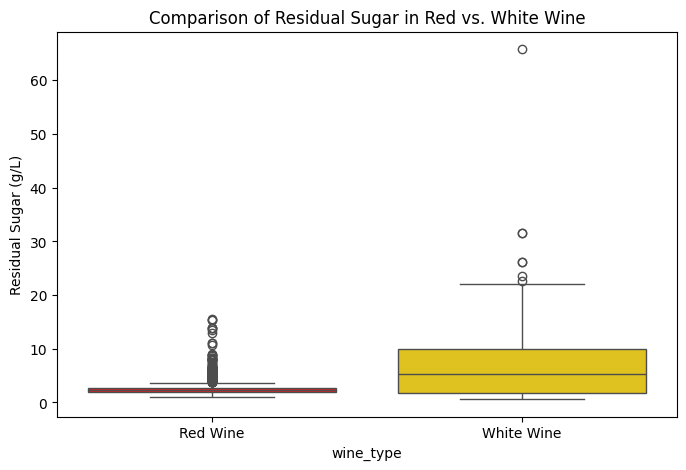

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data["wine_type"], y=data["residual sugar"], palette=["red", "gold"])
plt.xticks([0, 1], ["Red Wine", "White Wine"])
plt.ylabel("Residual Sugar (g/L)")
plt.title("Comparison of Residual Sugar in Red vs. White Wine")
plt.show()

Red Wine (Left Box)

- The median residual sugar is very low (close to 2 g/L).
- The interquartile range (IQR) is narrow, showing that most red wines have low sugar.
- There are many outliers above 5 g/L, but they are rare.

White Wine (Right Box)

- The median is significantly higher than red wine, around 5-6 g/L.
- The IQR is wider, indicating more variability in sugar levels.
- Several extreme outliers exist, with some white wines having over 60 g/L of sugar.

In [14]:
# Select features and target
X = data.drop(columns=['quality'])
y = data['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Split dataset by train, validatory and test parts
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [17]:
# Train the base Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
train_r2 = r2_score(y_train, y_pred_train)
val_r2 = r2_score(y_val, y_pred_val)

print(f"Train RMSE: {train_rmse:.3f}, Train R2: {train_r2:.3f}")
print(f"Validation RMSE: {val_rmse:.3f}, Validation R2: {val_r2:.3f}")

Train RMSE: 0.729, Train R2: 0.303
Validation RMSE: 0.750, Validation R2: 0.252


RMSE (Root Mean Squared Error) is a measure of the model's prediction error.
- Train RMSE (0.729) and Validation RMSE (0.750): The model performs slightly better on the training data, but the difference is small, suggesting it's not overfitting too much.

R² (Coefficient of Determination) represents the proportion of variance in the target variable that the model explains
- Train R² (0.303) and Validation R² (0.252): The model explains around 25-30% of the variance in both training and validation sets, which is low and indicates the model isn't fitting the data well.

In [18]:
# select hyperparameters using SGD regressor

param_dist = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'optimal', 'adaptive'],
    'max_iter': [1000, 2000, 5000]
}

sgd = SGDRegressor(random_state=42)
search = RandomizedSearchCV(sgd, param_dist, n_iter=10, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
search.fit(X_train, y_train)
print("Best Hyperparameters:", search.best_params_)

Best Hyperparameters: {'max_iter': 5000, 'learning_rate': 'adaptive', 'alpha': 0.01}


Best hyperparameters were selected for better convergence, efficient learning, and stability:
- max_iter: 5000 -> More iterations allow the model to converge properly, avoiding premature stopping.
- learning_rate: 'adaptive' -> Adjusts step size dynamically, preventing overshooting and ensuring stable learning.
- alpha: 0.01 -> Adds regularization to prevent overfitting while still allowing the model to learn useful patterns.

Why are these the best?
- Improved Convergence -> More iterations help the model reach a better solution.
- Balanced Learning Rate -> Adaptive learning rate optimizes training speed without instability.
- Regularization for Stability -> Keeps the model from overfitting while maintaining predictive power.

These settings likely improve accuracy (lower RMSE) and generalization (higher R²), making the model more reliable.